In [1]:
import sys
import numpy as np
import matplotlib.gridspec as gs
from sklearn.utils import check_random_state
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sys.path.insert(0, "..")

In [3]:
from hmm.datasets import synthetic
from hmm import util

In [4]:
from hmm import CategoricalVariationalMHMM, CategoricalVariationalHMM, CategoricalHMM, CategoricalMHMM
from hmm import plots
from hmm import HMMSearch

In [5]:
rs = check_random_state(2343435)

In [6]:
util.EPSILON

1e-09

## Sample Categorical Example

In [7]:
data, labels = synthetic.get_categorical_beal(rs)

In [8]:
print("6 sequences similar to: {}".format(data[0]))
print("6 sequences similar to: {}".format(data[6]))
print("6 sequences similar to: {}".format(data[12]))

6 sequences similar to: [0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0
 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2]
6 sequences similar to: [0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0
 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1]
6 sequences similar to: [0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1
 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1]


In [9]:
n_inits=10
n_iterations=1000

In [10]:
em_single_search = HMMSearch.HMMSearch(
    estimator=CategoricalHMM.CategoricalHMM(),
    n_components=np.arange(1,20), 
    n_inits=n_inits)

In [11]:
em_single_search.fit(data)

Not Exchanging at 1: -64.12804988327629 for -64.12804988327629
Not Exchanging at 1: -64.12804988327629 for -64.12804988327629
Not Exchanging at 1: -64.12804988327629 for -64.12804988327629
Not Exchanging at 1: -64.12804988327629 for -64.12804988327629
Not Exchanging at 1: -64.12804988327629 for -64.12804988327629
Not Exchanging at 1: -64.12804988327629 for -64.12804988327629
Not Exchanging at 1: -64.12804988327629 for -64.12804988327629
Not Exchanging at 1: -64.12804988327629 for -64.12804988327629
Not Exchanging at 1: -64.12804988327629 for -64.12804988327629
Exchanging at 2: -60.61586251602179 for -60.3293110627429
Not Exchanging at 2: -60.61586251602179 for -60.8646757754144
Not Exchanging at 2: -60.61586251602179 for -60.864506014441154
Not Exchanging at 2: -60.61586251602179 for -60.615863773782166
Not Exchanging at 2: -60.61586251602179 for -60.615862554190244
Not Exchanging at 2: -60.61586251602179 for -60.87321397539765
Not Exchanging at 2: -60.61586251602179 for -60.8645198117

Exchanging at 19: -15.665053119160271 for -15.630560775455454


HMMSearch(criterion='bic',
     estimator=CategoricalHMM(allowed_to_use_log=True, implementation='scaling',
        init_A='random', init_emissions='random', init_pi='random',
        n_components=1, n_features=None, n_inits=1, n_iterations=100,
        n_jobs=-1, random_state=None, smoothing=None, tol=1e-06, verbose=0),
     n_components=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
     n_inits=10, n_jobs=-1, random_state=None, verbose=False)

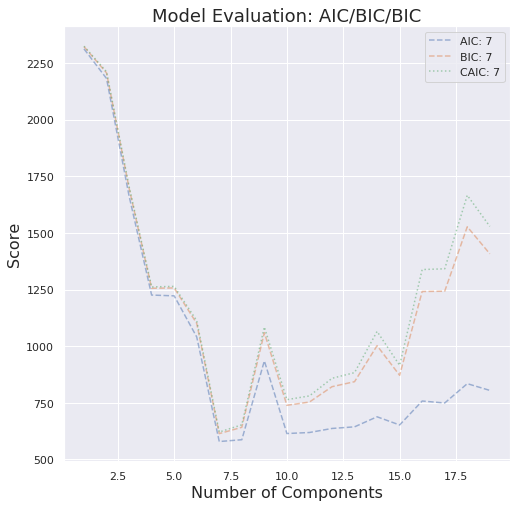

In [12]:
_ = plots.plot_bic_aic(em_single_search.scores_)

In [13]:
em_mixture_search2 = HMMSearch.HMMSearch(
    estimator=CategoricalMHMM.CategoricalMHMM(n_mixture_components=2,smoothing=("k", 1e-6), n_iterations=n_iterations),
    n_components=np.arange(1,5), 
    n_inits=n_inits
)
em_mixture_search3 = HMMSearch.HMMSearch(
    estimator=CategoricalMHMM.CategoricalMHMM(n_mixture_components=3,smoothing=("k", 1e-6), n_iterations=n_iterations),
    n_components=np.arange(1,5),
    n_inits=n_inits)
em_mixture_search4 = HMMSearch.HMMSearch(
    estimator=CategoricalMHMM.CategoricalMHMM(n_mixture_components=4,smoothing=("k", 1e-6), n_iterations=n_iterations),
    n_components=np.arange(1,5),
    n_inits=n_inits)
em_mixture_search5 = HMMSearch.HMMSearch(
    estimator=CategoricalMHMM.CategoricalMHMM(n_mixture_components=5,smoothing=("k", 1e-6), n_iterations=n_iterations),
    n_components=np.arange(1,5),
    n_inits=n_inits
)

In [14]:
em_mixture_search2.fit(data)
em_mixture_search3.fit(data)
em_mixture_search4.fit(data)
em_mixture_search5.fit(data)

Not Exchanging at 1: -58.441171475362744 for -58.441171475362744
Not Exchanging at 1: -58.441171475362744 for -58.441171475362744
Not Exchanging at 1: -58.441171475362744 for -64.12804987485914
Not Exchanging at 1: -58.441171475362744 for -58.441171475362744
Not Exchanging at 1: -58.441171475362744 for -64.12804988297631
Not Exchanging at 1: -58.441171475362744 for -58.441171475362744
Not Exchanging at 1: -58.441171475362744 for -58.441171475362744
Not Exchanging at 1: -58.441171475362744 for -58.441171475362744
Not Exchanging at 1: -58.441171475362744 for -58.441171475362744
Exchanging at 2: -51.579002878891785 for -51.56646239036692
Exchanging at 2: -51.579002878891785 for -51.57674403146704
Not Exchanging at 2: -51.579002878891785 for -58.40169815849798
Exchanging at 2: -51.579002878891785 for -51.56365458261502
Not Exchanging at 2: -51.579002878891785 for -51.58080285412112
Not Exchanging at 2: -51.579002878891785 for -58.42359997478104
Exchanging at 2: -51.579002878891785 for -51.

HMMSearch(criterion='bic',
     estimator=CategoricalMHMM(allowed_to_use_log=True, implementation='scaling',
        init_A='random', init_emissions='random',
        init_mixture_weights='uniform', init_pi='random', n_components=1,
        n_features=None, n_inits=1, n_iterations=1000, n_jobs=-1,
        n_mixture_components=5, random_state=None, smoothing=('k', 1e-06),
        tol=1e-06, verbose=0),
     n_components=array([1, 2, 3, 4]), n_inits=10, n_jobs=-1,
     random_state=None, verbose=False)

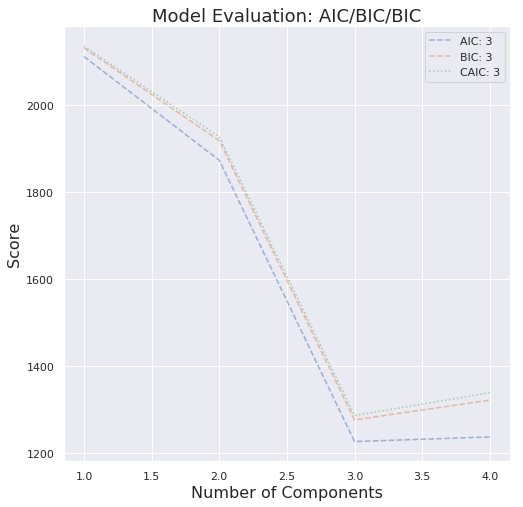

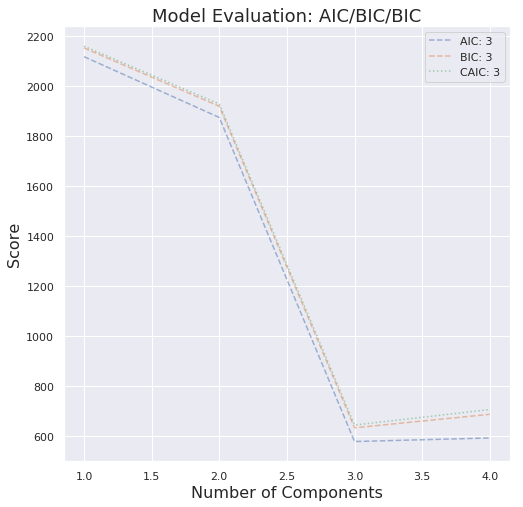

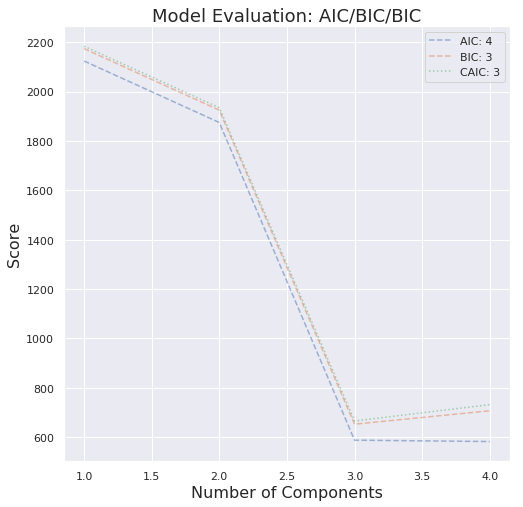

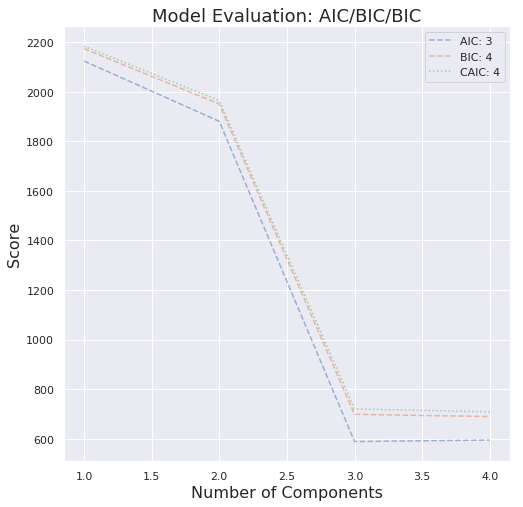

In [15]:
_ = plots.plot_bic_aic(em_mixture_search2.scores_)
_ = plots.plot_bic_aic(em_mixture_search3.scores_)
_ = plots.plot_bic_aic(em_mixture_search4.scores_)
_ = plots.plot_bic_aic(em_mixture_search5.scores_)

In [16]:
em_single_search.best_model_.bic(data), em_single_search.best_model_.num_free_params(), em_single_search.best_model_.score(data)

(613.7757169340596, 7, -15.691186185923105)

In [17]:
em_mixture_search2.best_model_.bic(data), em_mixture_search2.best_model_.num_free_params(), em_mixture_search2.best_model_.score(data)

(1276.302514855406, 10, -33.51264865706176)

In [18]:
em_mixture_search3.best_model_.bic(data), em_mixture_search3.best_model_.num_free_params(),em_mixture_search3.best_model_.score(data)

(634.5014828529102, 11, -15.490822314766923)

In [19]:
em_mixture_search4.best_model_.bic(data),em_mixture_search4.best_model_.score(data)

(653.0603939314552, -15.61830782694216)

In [20]:
em_mixture_search5.best_model_.bic(data)

689.3974952030734

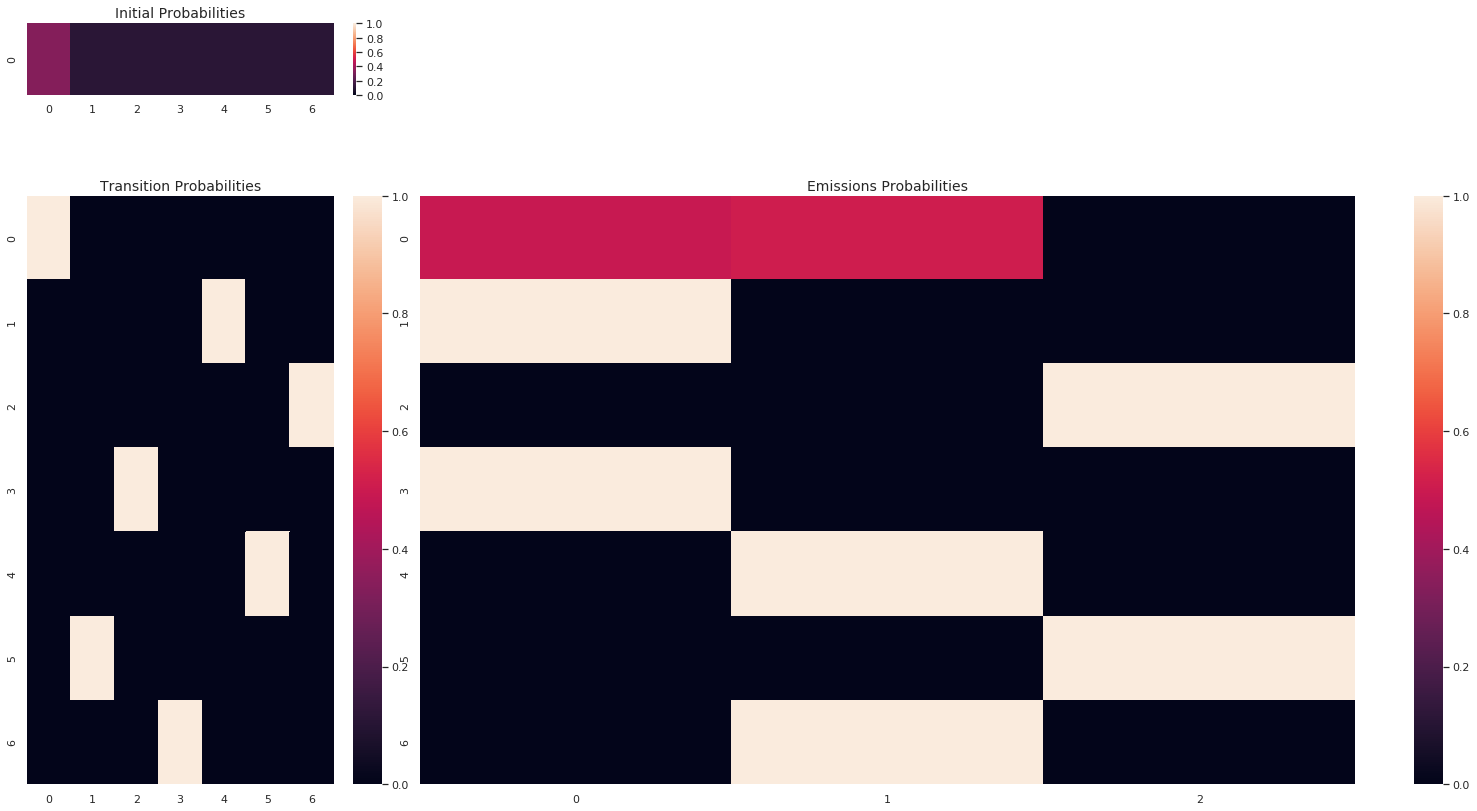

In [21]:
_ = plots.hinton_diagram(
em_single_search.best_model_.pi_,
em_single_search.best_model_.A_,
em_single_search.best_model_.B_,
    vmin=0,
    vmax=1,
)

In [22]:
em_mixture_search2.

SyntaxError: invalid syntax (<ipython-input-22-8a2635b6f58b>, line 1)

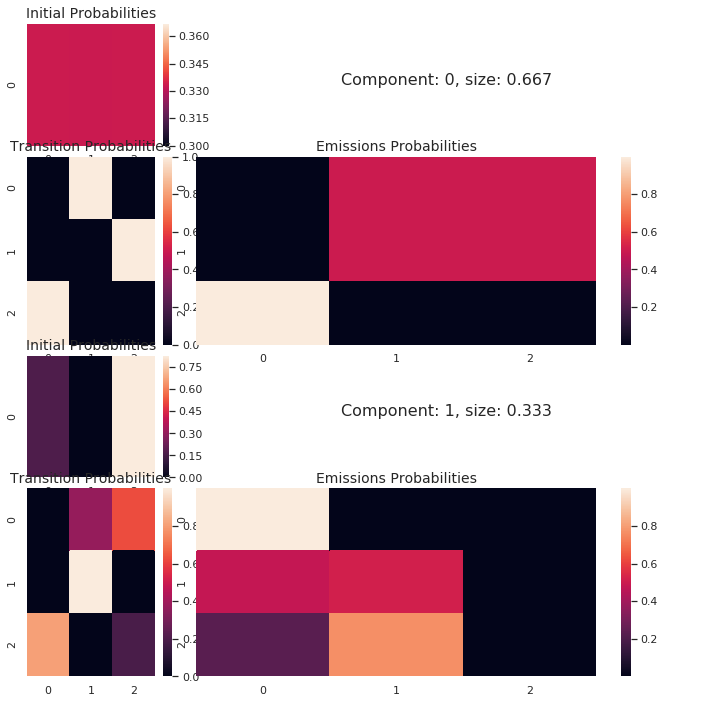

In [23]:
_ = plots.categorical_mixture_hinton(
    em_mixture_search2.best_model_.mixture_weights_,
    em_mixture_search2.best_model_.pi_,
    em_mixture_search2.best_model_.A_,
    em_mixture_search2.best_model_.B_
)

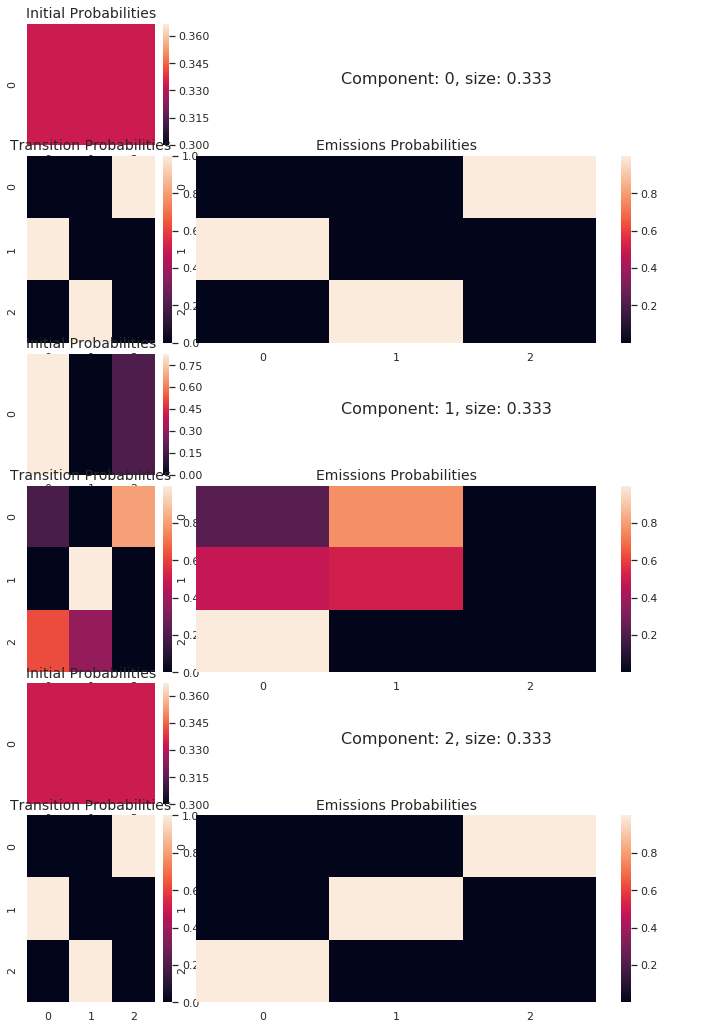

In [24]:
_ = plots.categorical_mixture_hinton(
    em_mixture_search3.best_model_.mixture_weights_,
    em_mixture_search3.best_model_.pi_,
    em_mixture_search3.best_model_.A_,
    em_mixture_search3.best_model_.B_)

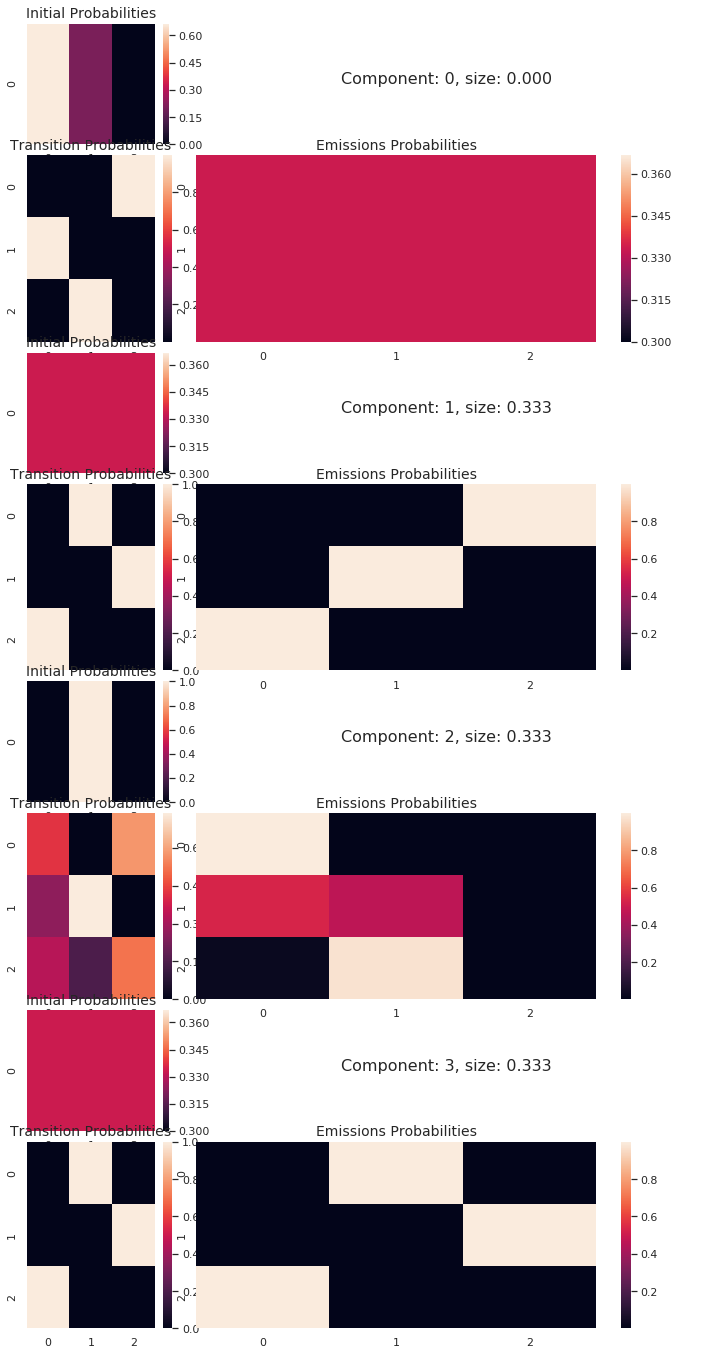

In [25]:
_ = plots.categorical_mixture_hinton(
    em_mixture_search4.best_model_.mixture_weights_,
    em_mixture_search4.best_model_.pi_,
    em_mixture_search4.best_model_.A_,
    em_mixture_search4.best_model_.B_)

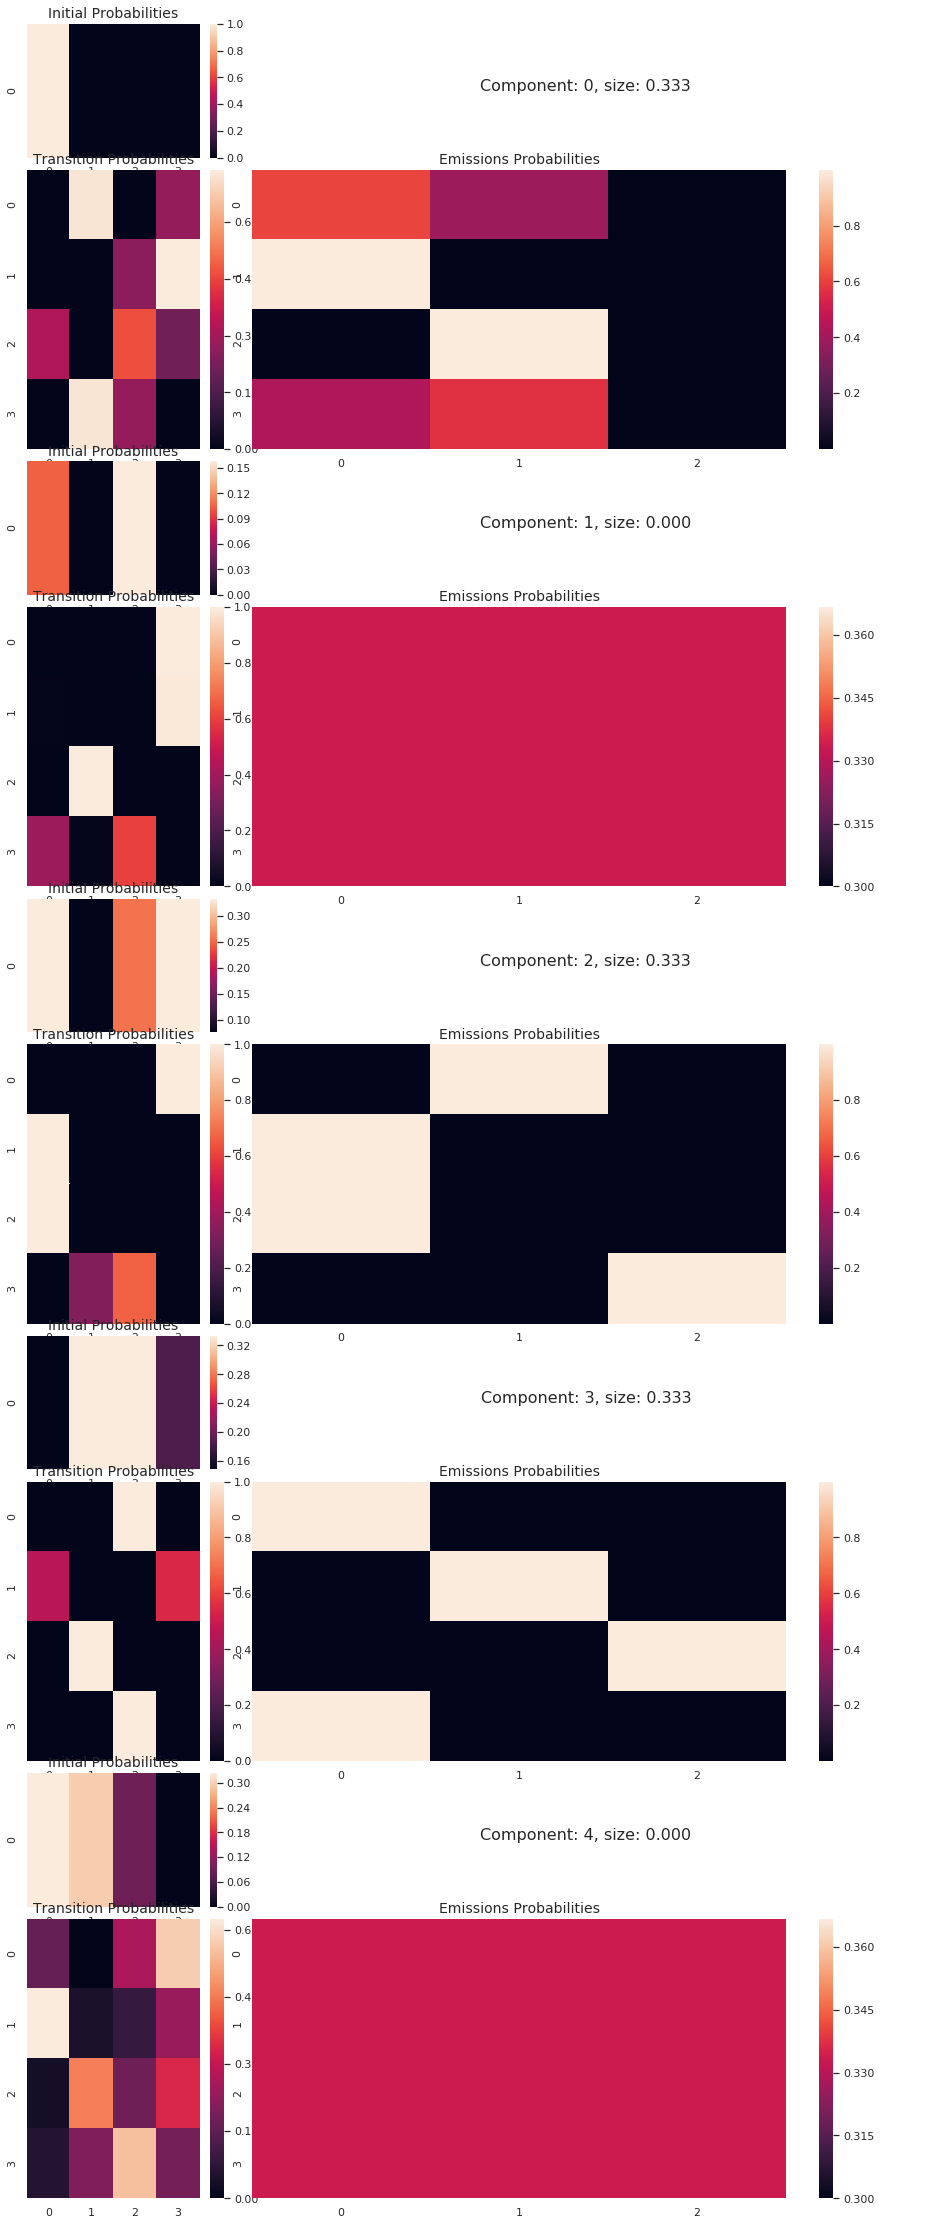

In [26]:
_ = plots.categorical_mixture_hinton(
    em_mixture_search5.best_model_.mixture_weights_,
    em_mixture_search5.best_model_.pi_,
    em_mixture_search5.best_model_.A_,
    em_mixture_search5.best_model_.B_)

In [27]:
vb_single_search = HMMSearch.HMMSearch(
    estimator=CategoricalVariationalHMM.CategoricalVariationalHMM(n_iterations=n_iterations),
    n_components=np.arange(1,20),
    n_inits=n_inits,
    criterion="score")

In [28]:
vb_single_search.fit(data)

Not Exchanging at 1: -64.12805171737847 for -64.12805171737847
Not Exchanging at 1: -64.12805171737847 for -64.12805171737847
Not Exchanging at 1: -64.12805171737847 for -64.12805171737847
Not Exchanging at 1: -64.12805171737847 for -64.12805171737847
Not Exchanging at 1: -64.12805171737847 for -64.12805171737847
Not Exchanging at 1: -64.12805171737847 for -64.12805171737847
Not Exchanging at 1: -64.12805171737847 for -64.12805171737847
Not Exchanging at 1: -64.12805171737847 for -64.12805171737847
Not Exchanging at 1: -64.12805171737847 for -64.12805171737847
Not Exchanging at 2: -60.64784274023615 for -60.64784297818207
Not Exchanging at 2: -60.64784274023615 for -60.64784299243797
Not Exchanging at 2: -60.64784274023615 for -60.64784298981138
Not Exchanging at 2: -60.64784274023615 for -60.89042625738586
Not Exchanging at 2: -60.64784274023615 for -60.64784297866187
Exchanging at 2: -60.64784274023615 for -60.373946101606215
Not Exchanging at 2: -60.64784274023615 for -61.5902802238

Exchanging at 18: -26.062803934071866 for -17.93355187079589
Exchanging at 18: -26.062803934071866 for -16.76694104080552
Not Exchanging at 18: -26.062803934071866 for -29.881743043570832
Not Exchanging at 18: -26.062803934071866 for -36.07878961799415
Exchanging at 18: -26.062803934071866 for -17.91277730379217
Exchanging at 18: -26.062803934071866 for -18.20621475858231
Exchanging at 18: -26.062803934071866 for -17.90574425399165
Not Exchanging at 18: -26.062803934071866 for -37.86218423844625
Exchanging at 18: -26.062803934071866 for -19.332902319283047
Not Exchanging at 19: -16.93482180521366 for -18.378666272706024
Not Exchanging at 19: -16.93482180521366 for -42.914225427828086
Not Exchanging at 19: -16.93482180521366 for -18.47623196400771
Not Exchanging at 19: -16.93482180521366 for -34.8008630462007
Not Exchanging at 19: -16.93482180521366 for -34.7015716345019
Not Exchanging at 19: -16.93482180521366 for -17.736333649655556
Not Exchanging at 19: -16.93482180521366 for -17.261

HMMSearch(criterion='score',
     estimator=CategoricalVariationalHMM(A_prior=None, B_prior=None,
             implementation='scaling', n_components=1, n_features=None,
             n_inits=1, n_iterations=1000, n_jobs=-1, pi_prior=None,
             random_state=None, tol=1e-06, verbose=0),
     n_components=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
     n_inits=10, n_jobs=-1, random_state=None, verbose=False)

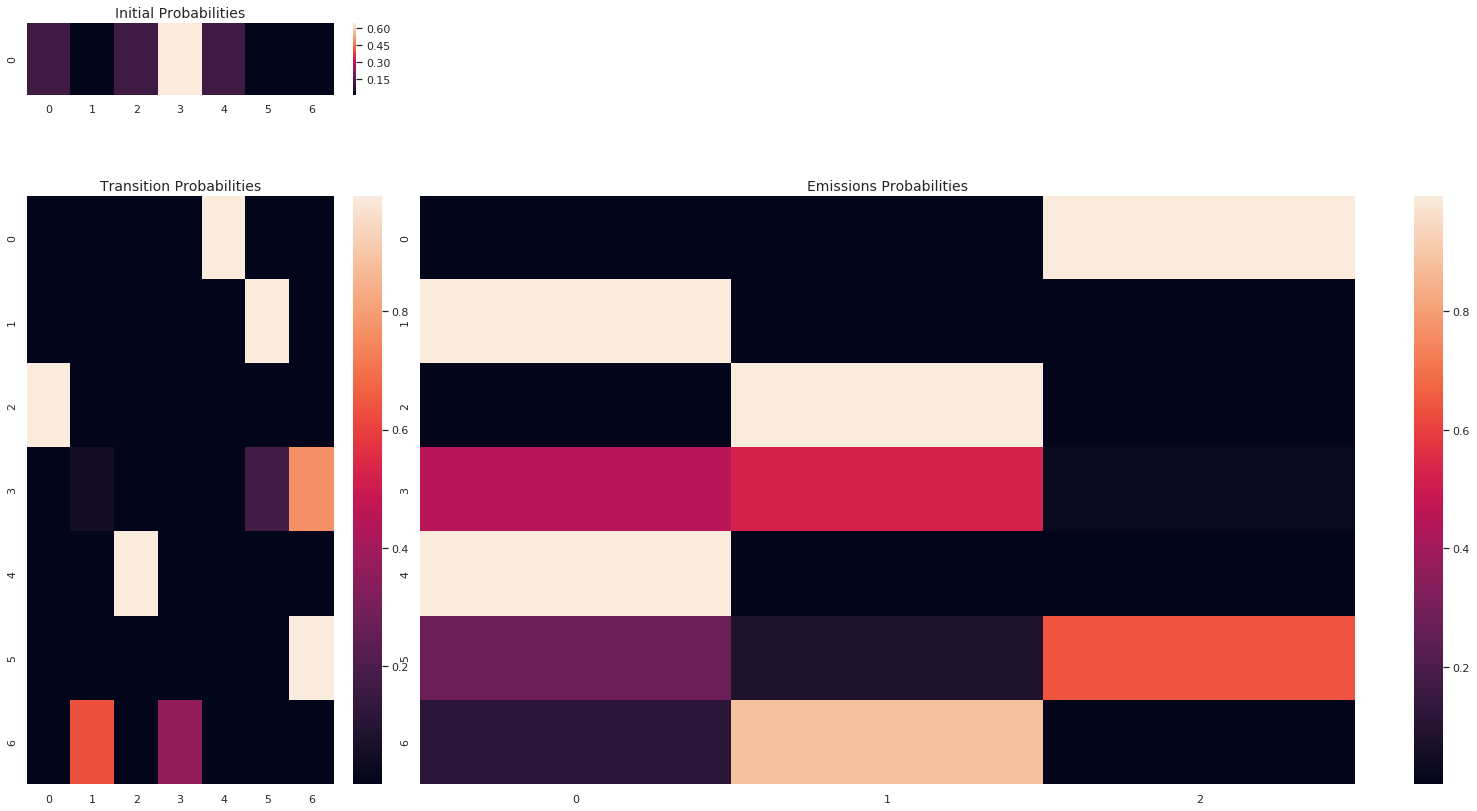

In [41]:
_ = plots.hinton_diagram(
    vb_single_search.bests_[7].pi_normalized_,
    vb_single_search.bests_[7].A_normalized_,
    vb_single_search.bests_[7].B_normalized_)

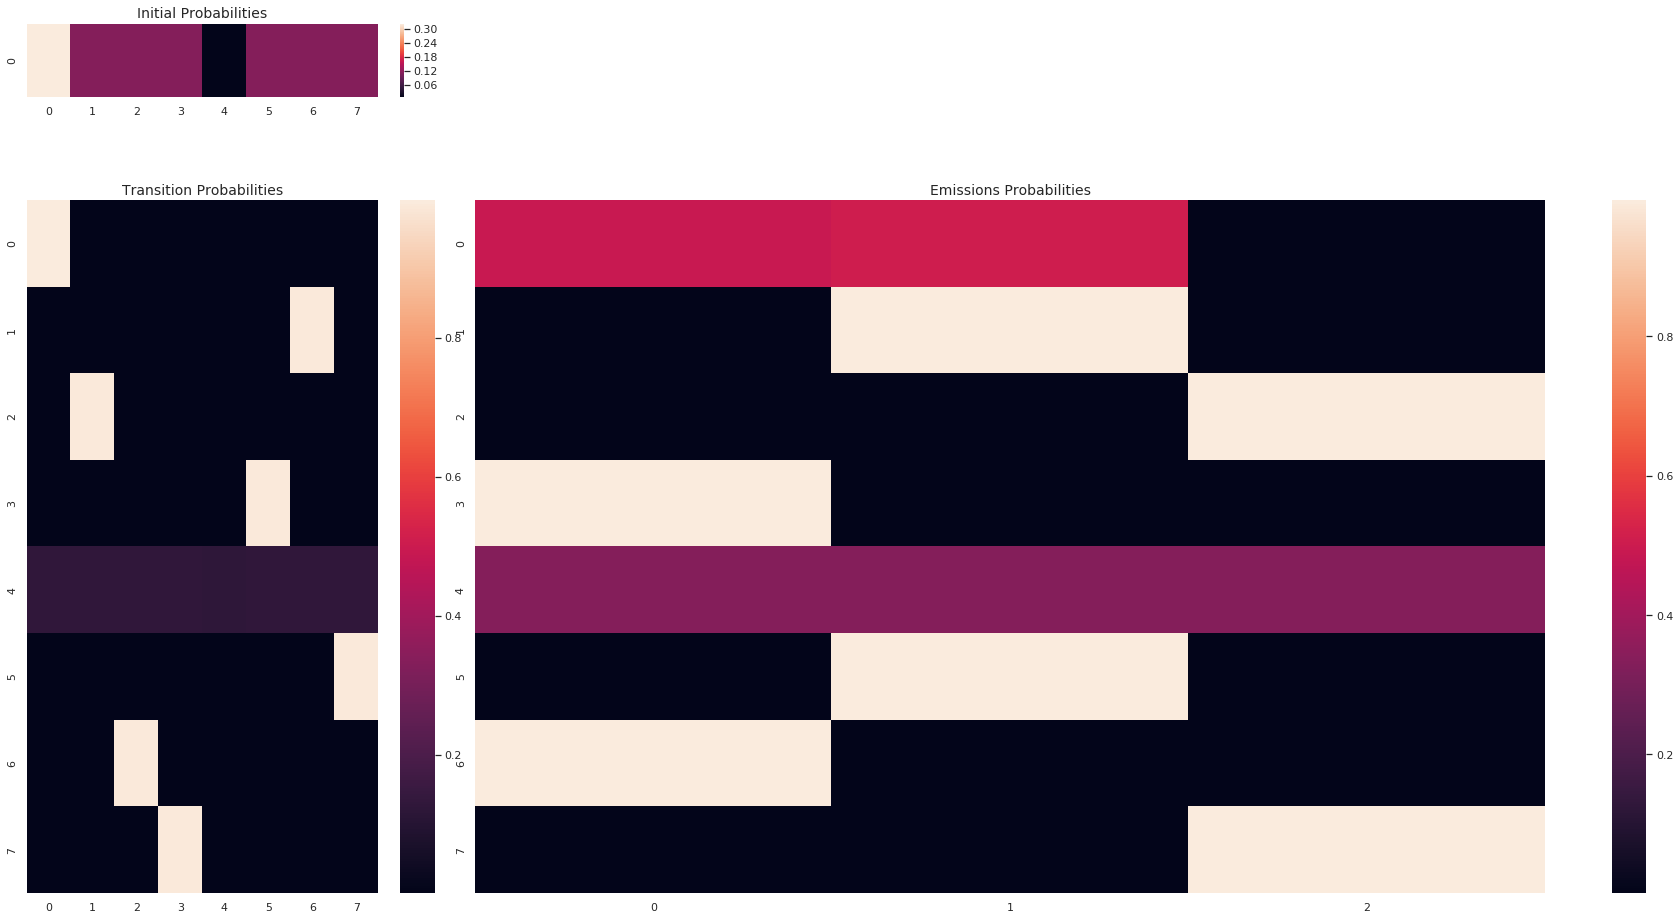

In [40]:
_ = plots.hinton_diagram(
    vb_single_search.best_model_.pi_normalized_,
    vb_single_search.best_model_.A_normalized_,
    vb_single_search.best_model_.B_normalized_)

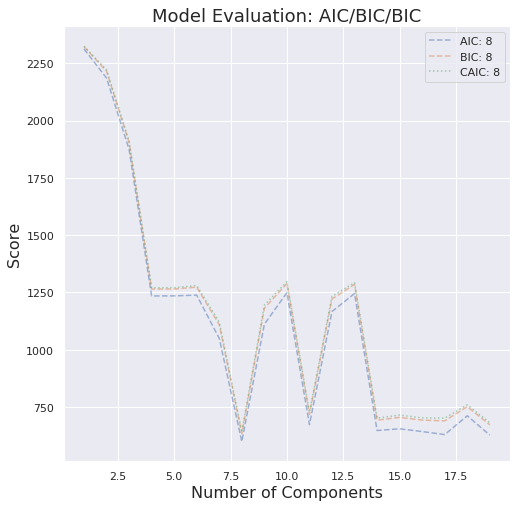

In [29]:
_ = plots.plot_bic_aic(vb_single_search.scores_)

In [30]:
lower_bounds = [v["score"] for v in vb_single_search.scores_.values()]
components = list(vb_single_search.scores_.keys())

In [31]:
def factorial(n):
    if n == 1:
        return 1
    return n * factorial(n-1)

In [32]:
n_features = vb_single_search.best_model_.n_features_
adjusted = np.asarray(lower_bounds)
for i,c in enumerate(components):
    adj = np.log(c * factorial(n_features))
    print(c, n_features, c * factorial(n_features), adj)
    adjusted[i] += adj

1 3 6 1.791759469228055
2 3 12 2.4849066497880004
3 3 18 2.8903717578961645
4 3 24 3.1780538303479458
5 3 30 3.4011973816621555
6 3 36 3.58351893845611
7 3 42 3.7376696182833684
8 3 48 3.871201010907891
9 3 54 3.9889840465642745
10 3 60 4.0943445622221
11 3 66 4.189654742026425
12 3 72 4.276666119016055
13 3 78 4.356708826689592
14 3 84 4.430816798843313
15 3 90 4.499809670330265
16 3 96 4.564348191467836
17 3 102 4.624972813284271
18 3 108 4.68213122712422
19 3 114 4.736198448394496


In [33]:
def plot_scores(scores):
    lower_bounds = [v["score"] for v in scores.values()]
    components = list(scores)
    f, ax = plt.subplots(figsize=(8,8))
    ax.plot(components, lower_bounds)
    best = np.argmin(lower_bounds)
    ax.axvline(components[best], color="red")
    _ = ax.set_xticks(components)
    return f

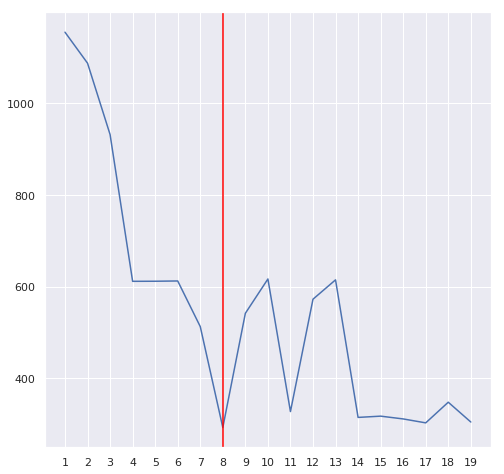

In [34]:
_ = plot_scores(vb_single_search.scores_)

In [35]:
vb_mixtures_search2 = HMMSearch.HMMSearch(
    estimator=CategoricalVariationalMHMM.CategoricalVariationalMHMM(n_mixture_components=2, n_iterations=n_iterations),
    n_inits=n_inits,
    n_components=np.arange(1,10),
    criterion="score"
)
vb_mixtures_search3 = HMMSearch.HMMSearch(
    estimator=CategoricalVariationalMHMM.CategoricalVariationalMHMM(n_mixture_components=3, n_iterations=n_iterations),
    n_inits=n_inits,
    n_components=np.arange(1,10),
    criterion="score"
)
vb_mixtures_search4 = HMMSearch.HMMSearch(
    estimator=CategoricalVariationalMHMM.CategoricalVariationalMHMM(n_mixture_components=4, n_iterations=n_iterations),
    n_inits=n_inits,
    n_components=np.arange(1,10),
    criterion="score"
)
vb_mixtures_search5 = HMMSearch.HMMSearch(
    estimator=CategoricalVariationalMHMM.CategoricalVariationalMHMM(n_mixture_components=5, n_iterations=n_iterations),
    n_inits=n_inits,
    n_components=np.arange(1,10),
    criterion="score"
)

In [36]:
vb_mixtures_search2.fit(data)
vb_mixtures_search3.fit(data)
vb_mixtures_search4.fit(data)
vb_mixtures_search5.fit(data)


Exchanging at 1: -62.74497816398645 for -57.82313301290667
Exchanging at 1: -62.74497816398645 for -57.82313301290667
Exchanging at 1: -62.74497816398645 for -57.82313301290667
Exchanging at 1: -62.74497816398645 for -57.82313301290667
Exchanging at 1: -62.74497816398645 for -57.82313301290667
Exchanging at 1: -62.74497816398645 for -57.82313301290667
Not Exchanging at 1: -62.74497816398645 for -62.74497816398645
Exchanging at 1: -62.74497816398645 for -57.82313301290667
Exchanging at 1: -62.74497816398645 for -57.82313301290667
Exchanging at 2: -60.367887299683424 for -57.84881975712855
Exchanging at 2: -60.367887299683424 for -51.06611377625976
Exchanging at 2: -60.367887299683424 for -57.84881975712863
Exchanging at 2: -60.367887299683424 for -57.848819757074516
Exchanging at 2: -60.367887299683424 for -57.80254180803671
Exchanging at 2: -60.367887299683424 for -57.848819757128304
Exchanging at 2: -60.367887299683424 for -51.01982611918322
Exchanging at 2: -60.367887299683424 for -5

Not Exchanging at 7: -15.78948751991821 for -27.01092741463313
Exchanging at 7: -15.78948751991821 for -15.219457098777887
Not Exchanging at 7: -15.78948751991821 for -28.281495098160452
Not Exchanging at 7: -15.78948751991821 for -40.192800466688276
Not Exchanging at 7: -15.78948751991821 for -33.38748925345346
Not Exchanging at 7: -15.78948751991821 for -15.877810054599413
Exchanging at 7: -15.78948751991821 for -15.649040618003577
Not Exchanging at 7: -15.78948751991821 for -33.38748925345346
Not Exchanging at 8: -15.234717996826848 for -27.936028643030337
Exchanging at 8: -15.234717996826848 for -15.230414333591657
Not Exchanging at 8: -15.234717996826848 for -15.710015136780855
Not Exchanging at 8: -15.234717996826848 for -15.691771565034792
Not Exchanging at 8: -15.234717996826848 for -15.89384262177911
Not Exchanging at 8: -15.234717996826848 for -34.805706359025905
Not Exchanging at 8: -15.234717996826848 for -15.673992187362753
Not Exchanging at 8: -15.234717996826848 for -15.

Not Exchanging at 4: -33.3438679333547 for -33.3438679333547
Exchanging at 4: -33.3438679333547 for -15.587727222692402
Exchanging at 4: -33.3438679333547 for -15.141948399251532
Exchanging at 4: -33.3438679333547 for -15.141948399251552
Exchanging at 4: -33.3438679333547 for -15.587727222692543
Exchanging at 4: -33.3438679333547 for -15.145657894367238
Exchanging at 5: -15.175419139514812 for -15.053637245440333
Not Exchanging at 5: -15.175419139514812 for -15.175419139514824
Not Exchanging at 5: -15.175419139514812 for -15.175419139514819
Not Exchanging at 5: -15.175419139514812 for -15.175419139514812
Not Exchanging at 5: -15.175419139514812 for -56.958211229730665
Not Exchanging at 5: -15.175419139514812 for -51.10821145480733
Not Exchanging at 5: -15.175419139514812 for -33.36200071004589
Not Exchanging at 5: -15.175419139514812 for -36.14378556192244
Not Exchanging at 5: -15.175419139514812 for -33.25241319146586
Not Exchanging at 6: -15.243901681800757 for -15.377607682338736
Ex

HMMSearch(criterion='score',
     estimator=CategoricalVariationalMHMM(A_prior='uniform', B_prior='uniform',
              allowed_to_use_log=True, implementation='scaling',
              mixture_weights_prior=None, n_components=1, n_features=None,
              n_inits=1, n_iterations=1000, n_jobs=-1,
              n_mixture_components=5, pi_prior='uniform',
              random_state=None, tol=1e-06, verbose=0),
     n_components=array([1, 2, 3, 4, 5, 6, 7, 8, 9]), n_inits=10,
     n_jobs=-1, random_state=None, verbose=False)

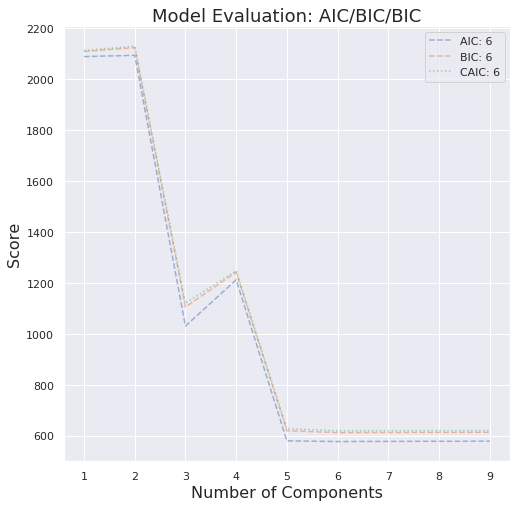

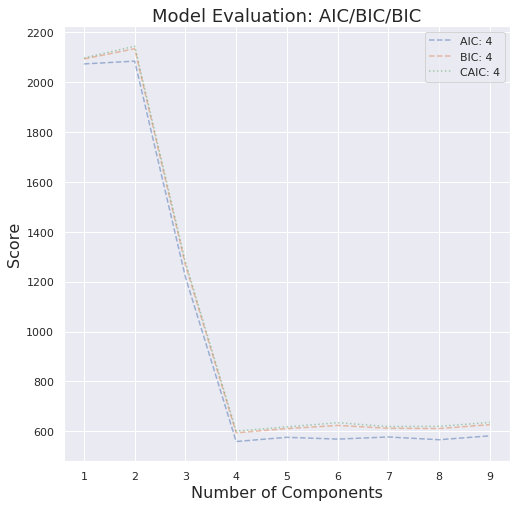

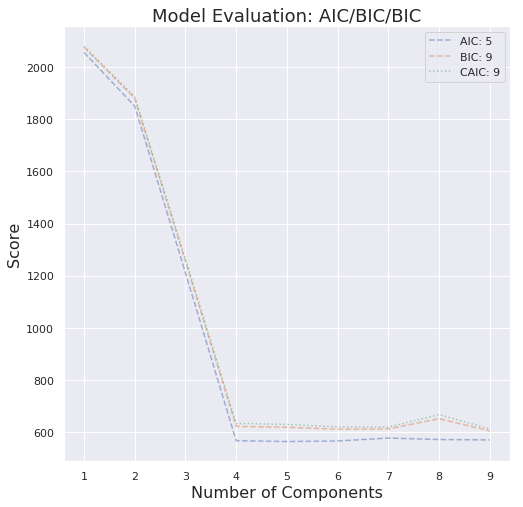

In [37]:
_ = plots.plot_bic_aic(vb_mixtures_search2.scores_)
_ = plots.plot_bic_aic(vb_mixtures_search3.scores_)
_ = plots.plot_bic_aic(vb_mixtures_search4.scores_)
_ = plots.plot_bic_aic(vb_mixtures_search5.scores_)

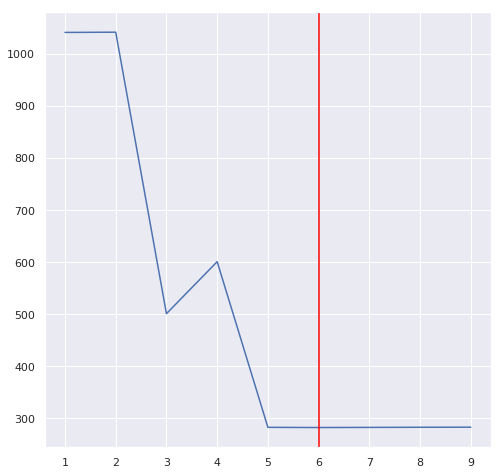

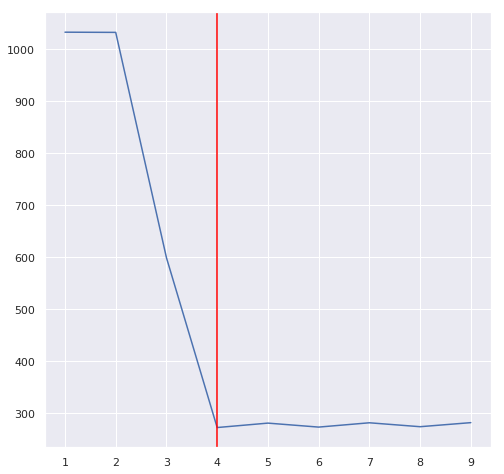

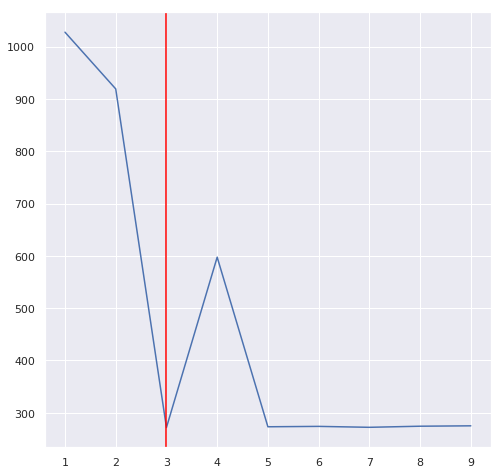

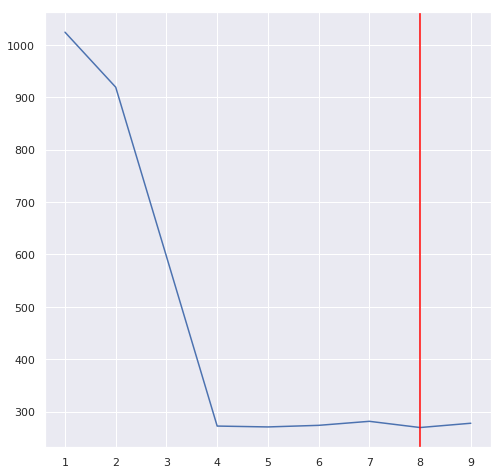

In [38]:
_ = plot_scores(vb_mixtures_search2.scores_)
_ = plot_scores(vb_mixtures_search3.scores_)
_ = plot_scores(vb_mixtures_search4.scores_)
_ = plot_scores(vb_mixtures_search5.scores_)


In [42]:
m = vb_mixtures_search2.best_model_
print(m.mixture_weights_normalized_)
_ = plots.categorical_mixture_hinton(
    m.mixture_weights_normalized_,
    m.pi_normalized_,
    m.A_normalized_,
    m.B_normalized_
)

[0.65789474 0.34210526]


In [43]:
m = vb_mixtures_search3.best_model_
print(m.mixture_weights_normalized_)
_ = plots.categorical_mixture_hinton(
    m.mixture_weights_normalized_,
    m.pi_normalized_,
    m.A_normalized_,
    m.B_normalized_
)

[0.33333333 0.33333333 0.33333333]


In [44]:
m = vb_mixtures_search4.best_model_
print(m.mixture_weights_normalized_)
_ = plots.categorical_mixture_hinton(
    m.mixture_weights_normalized_,
    m.pi_normalized_,
    m.A_normalized_,
    m.B_normalized_
)

[0.32894737 0.32894737 0.32894737 0.01315789]


In [45]:
vb_single_search.best_model_.bic(data)

634.5203572167535

In [46]:
vb_mixtures_search4.best_model_.bic(data)

592.2894799796546

In [47]:
vb_single_search.best_model_.num_free_params()

7

In [48]:
vb_mixtures_search4.best_model_.num_free_params()

7

In [ ]:
assert False

In [ ]:
best = CategoricalVariationalMHMM.CategoricalVariationalMHMM(n_mixture_components=3, n_components=3, n_inits=n_inits, n_iterations=n_iterations)

In [ ]:
best.fit(data)

In [ ]:
_ = plots.categorical_mixture_hinton(
    best.pi_normalized_,
    best.A_normalized_,
    best.B_normalized_)

In [ ]:
best.free_energy_[-1]

In [ ]:
_ = plots.learning_plot(best.free_energy_)

In [ ]:
_ = plots.plot_mixture_energies(best.verbose_free_energy_)

In [ ]:
import scipy.linalg
import sklearn.utils
import sklearn.preprocessing

In [ ]:
class EMBlock(CategoricalHMM.CategoricalHMM):
    def _init_A(self, X):
        rs = sklearn.utils.check_random_state(self.random_state)
        blocks = []
        for i in range(3):
            blocks.append(
                sklearn.preprocessing.normalize(
                    rs.rand(3,3),
                    norm="l1",
                    axis=1)
            )
    
        self.A_ = scipy.linalg.block_diag(*blocks)

    pass


In [ ]:
class VariationalBlock(CategoricalVariationalHMM.CategoricalVariationalHMM):
    def _init_A(self, X):
        rs = sklearn.utils.check_random_state(self.random_state)
        blocks = []
        for i in range(3):
            blocks.append(
                sklearn.preprocessing.normalize(
                    rs.rand(3,3),
                    norm="l1",
                    axis=1)
            )
    
        self.A_prior_ = scipy.linalg.block_diag(*blocks)
        self.A_prior_[self.A_prior_==0] = 1/100
        #print(self.A_prior_)
        self.A_counts_ = self.A_prior_ * X.shape[0] * X.shape[1] / 4
    pass


In [ ]:
variational_block = VariationalBlock(n_components=9, n_inits=n_inits, n_jobs=1, n_iterations=n_iterations)
em_block = EMBlock(n_components=9, n_inits=n_inits, n_jobs=1, n_iterations=n_iterations)

In [ ]:
variational_block.fit(data)
em_block.fit(data)

In [ ]:
em_block.bic(data)

In [ ]:
variational_block.bic(data)

In [ ]:
_ = plots.learning_plot(variational_block.free_energy_)

In [ ]:
_ = plots.learning_plot(em_block.loglikelihoods_)

In [ ]:
_ = plots.hinton_diagram(
variational_block.pi_normalized_,
variational_block.A_normalized_,
variational_block.B_normalized_,
    vmin=0,
    vmax=1,
)

In [ ]:
_ = plots.hinton_diagram(
    em_block.pi_,
    em_block.A_,
    em_block.B_,
    vmin=0,
vmax=1)

In [ ]:
em_single_search.best_model_.bic(data), em_block.bic(data)

In [ ]:
vb_single_search.best_model_.bic(data), variational_block.bic(data)

In [ ]:
vb_single_search.best_model_.free_energy_[-1], variational_block.free_energy_[-1], best.free_energy_[-1]

In [ ]:
best.A_posterior_

In [ ]:
best